# An analysis of the Anscombes Quartet Dataset
by Colm Doherty, Nov 2018

### 1. Background to the dataset

#### Anscombe's quartet was constructed by the statistician Francis Anscombe in 1973 to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties. <sup>[1]</sup>

It comprises four datasets with nearly identical simple descriptive statistics, yet they appear very different when graphed. Each dataset consists of eleven (x,y) points. He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."<sup>[2]</sup>

Anscombes datasets are synthetic rather than observed values, insofaras they were created by Anscombe. Quite how he created them is unknown.



### Libraries

In [1]:
# lets have matplotlib show interactive plots in the notebook
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [3]:
# Load Anscombes datasets from the repository formatting them as classes, and show the values
df1 = sns.load_dataset("anscombe")
df1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [4]:
# Load Anscombes dataset in a format identifying x1,x2,etc values & plot a simple scattergraph
df2 = pd.read_csv ("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/anscombe.csv")
df2

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
0,1,10,10,10,8,8.04,9.14,7.46,6.58
1,2,8,8,8,8,6.95,8.14,6.77,5.76
2,3,13,13,13,8,7.58,8.74,12.74,7.71
3,4,9,9,9,8,8.81,8.77,7.11,8.84
4,5,11,11,11,8,8.33,9.26,7.81,8.47
5,6,14,14,14,8,9.96,8.10,8.84,7.04
6,7,6,6,6,8,7.24,6.13,6.08,5.25
7,8,4,4,4,19,4.26,3.10,5.39,12.50
8,9,12,12,12,8,10.84,9.13,8.15,5.56
9,10,7,7,7,8,4.82,7.26,6.42,7.91


### 2 - Plot the interesting aspects of the dataset

Simple scatterplots of each dataset seem to show quite distinct & differing patterns.

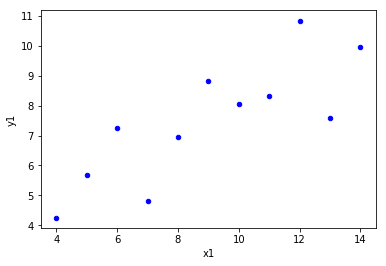

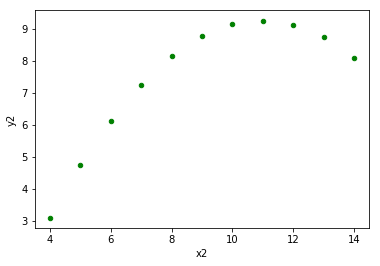

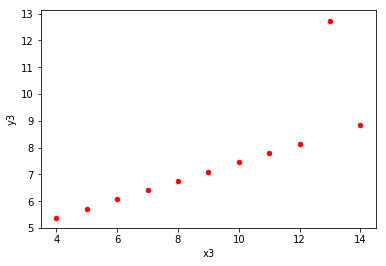

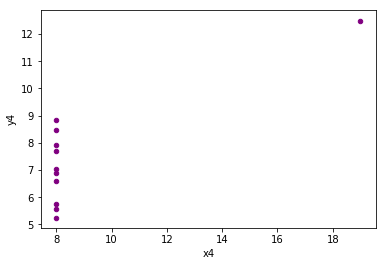

In [5]:
df2.plot(kind='scatter',x='x1',y='y1',color='blue')
df2.plot(kind='scatter',x='x2',y='y2',color='green')
df2.plot(kind='scatter',x='x3',y='y3',color='red')
df2.plot(kind='scatter',x='x4',y='y4',color='purple')
plt.show()

However, once we plot the datapoints and regression models, using the lmplot function in seaborn, it becomes apparent that they all share the same Linear Regression line, with the same slope. So clearly they have something in common.

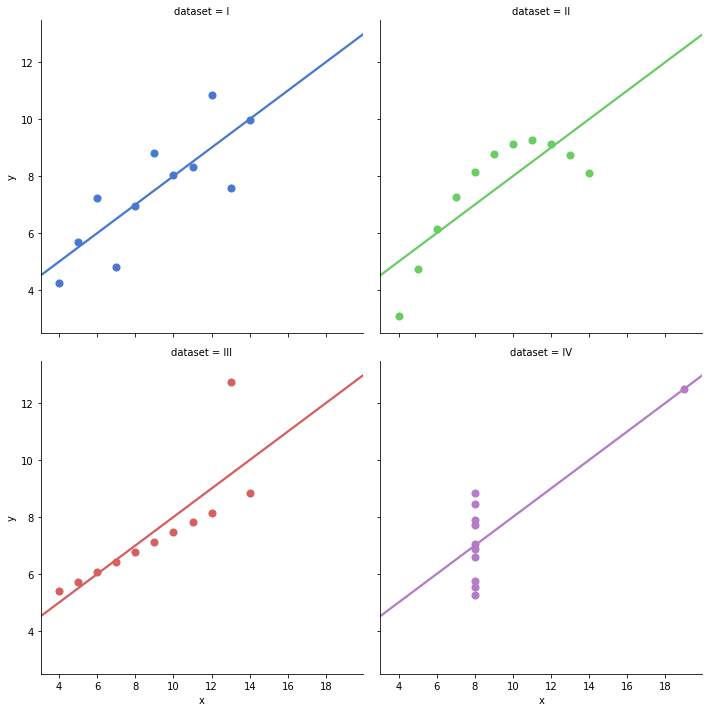

In [6]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df1,
           col_wrap=2, ci=None, palette="muted", 
           scatter_kws={"s": 50, "alpha": 1})
plt.show()

### 3 - Calculate the descriptive statistics of the variables in the dataset

In [9]:
df1.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Having seen quite 4 differing plots for the datasets, its surprising to note how many of the summary statistics are close to identical:

* The mean x value is 9 for each dataset
* The mean y value is 7.50 for each dataset
* the standard deviation for x is 3.31 in each dataset
* the standard deviation for y is 2.03 in each dataset

Now lets look at the coefficient of correlation bewteen the x and y values. Because of the way dataset df is constructed, with dataset number, x and y labels, in order to calculate the correlation between x and y for each dataset, I need to restate each of the values of x1, y1 etc as a distinct array which can be called by the np.corrcoef(x, y) command:

In [ ]:
#numpy array Anscombes data
x1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
x2 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
x3 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

In [ ]:
# find the correlation between x and y for each dataset:
corrx1=np.corrcoef(x1, y1)
corrx1

In [ ]:
corrx2=np.corrcoef(x2, y2)
corrx2

In [ ]:
corrx3=np.corrcoef(x3, y3)
corrx3

In [ ]:
corrx4=np.corrcoef(x4, y4)
corrx4

It's clear that the correlation between x and y is 0.816 for each dataset. This is a high correlation between the x and y values in each case. Ordinarily, this might infer a relationship between an independent variable and dependent variable, but in this case we know that the values were fabricated by Anscombe in order to make a point.

### 4 - why the dataset is interesting, referring to the plots and statistics above

Perhaps the most interesting feature of the Anscombe dataset is that while it consists of four datasets that have identical summary statistics (e.g., mean, standard deviation, and correlation), they produce very dissimilar data graphics (scatterplots).

On first examination of the datasets, what's noticeable is that the x values are the same in each of the first three, while the y values are seldom repeated. In the fourth dataset, all the x values are 8 except for one outlier at 19 while, once again, the y values are seldom repeated. In these respects, the four datasets seem unlikely to be the product of natural observations and more likely to be fabricated in some way.

On the scatter plots, whats evident is that while any apparent pattern suggested by the plotted values is quite distinct to each dataset, the line of best fit is actually identical for all four plots. This is so improbable as to suggest that their creator may have begun with the plots and then contrived datasets to fit them.





### In Conclusion
Anscombe's quartet does indeed prove his original thesis, namely that while summary statistics are useful in uncovering possible relationships between variables in a dataset, they may not tell the whole story. It's necessary to examine both the graphs and the summary statistics before drawing conclusions. 




### REFERENCES

1. https://en.wikipedia.org/wiki/Anscombe%27s_quartet
2. https://en.wikipedia.org/wiki/Anscombe%27s_quartet
3. https://rstudio-pubs-static.s3.amazonaws.com/350044_cba17bbef9fc430d927a6ad99179ae2e.html
4. https://heapanalytics.com/blog/data-stories/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story
5. https://seaborn.pydata.org/generated/seaborn.lmplot.html
